## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

## Load the dataset

In [71]:
file_path = "education_career_success1.csv"  
df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    4985 non-null   float64
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        4999 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  4996 non-null   float64
 9   Projects_Completed     4995 non-null   float64
 10  Certifications         4992 non-null   float64
 11  Soft_Skills_Score      4995 non-null   float64
 12  Networking_Score       4998 non-null   float64
 13  Job_Offers             4998 non-null   float64
 14  Starting_Salary        4992 non-null   float64
 15  Care

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24.0,Male,3.58,1052,291,3.96,Arts,3.0,7.0,2.0,9.0,8.0,5.0,27200.0,4,5,Entry,7.0,No
1,S00002,21.0,Other,2.52,1211,112,3.63,Law,4.0,7.0,3.0,8.0,1.0,4.0,25000.0,1,1,Mid,7.0,No
2,S00003,28.0,Female,3.42,1193,715,2.63,Medicine,4.0,8.0,1.0,1.0,9.0,0.0,NaN,9,3,Entry,7.0,No
3,S00004,25.0,Male,2.43,1497,170,2.81,Computer Science,3.0,9.0,1.0,10.0,6.0,1.0,57400.0,7,5,Mid,5.0,No
4,S00005,22.0,Male,2.08,1012,599,2.48,Engineering,4.0,6.0,4.0,10.0,9.0,4.0,47600.0,9,5,Entry,2.0,No


## Find Missing values

In [73]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Age                      15
High_School_GPA           1
Internships_Completed     4
Projects_Completed        5
Certifications            8
Soft_Skills_Score         5
Networking_Score          2
Job_Offers                2
Starting_Salary           8
Work_Life_Balance         1
dtype: int64

## Replace missing values by Mean

In [75]:
# Replace missing values with the mode for numerical columns
#I have used Mode here Because of dataset
numerical_cols = ['Age', 'High_School_GPA', 'Internships_Completed', 'Projects_Completed', 
                  'Certifications', 'Soft_Skills_Score', 'Networking_Score', 
                  'Job_Offers', 'Starting_Salary', 'Work_Life_Balance']

df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mode()[0]))

df.isnull().sum() 

Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64

In [77]:
df["Starting_Salary"] = df["Starting_Salary"].astype(int)

## Check the outliers

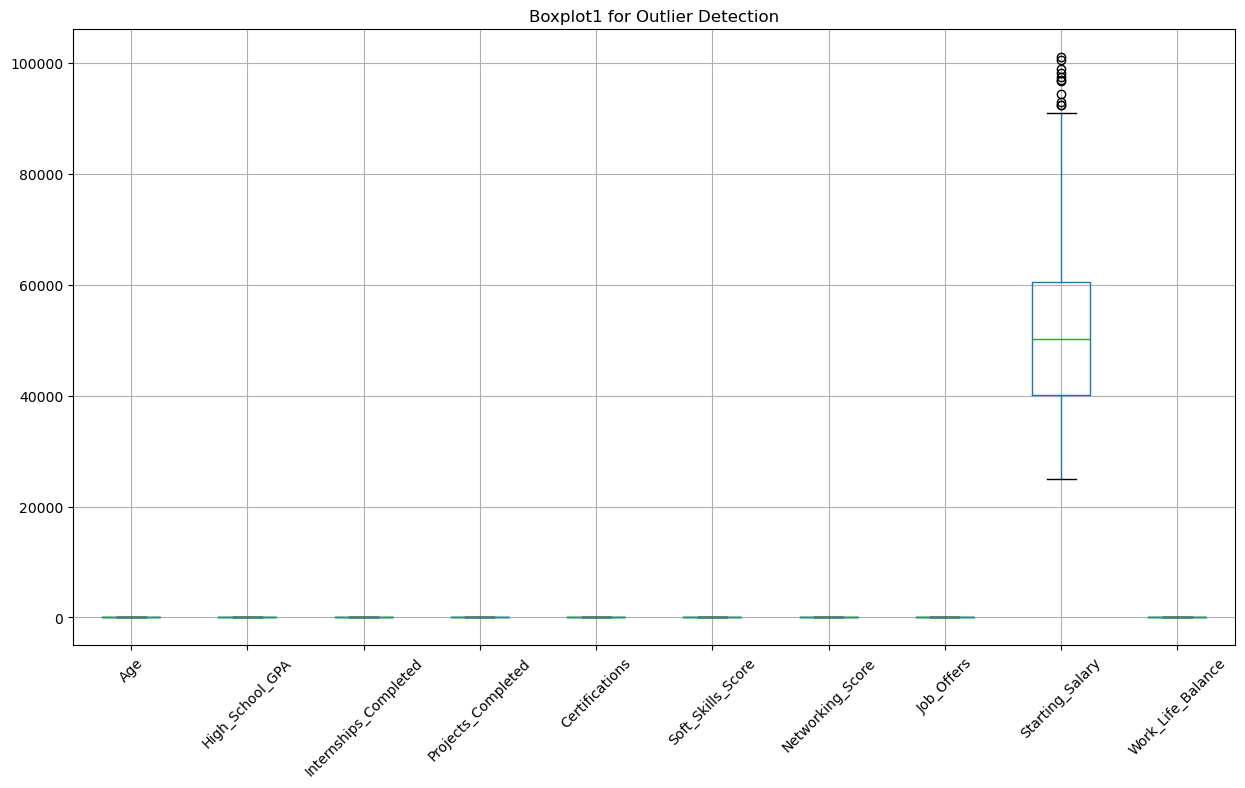

In [79]:
# Visualizing outliers using boxplots
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Boxplot1 for Outlier Detection")
plt.show()

## Drop the outliers

In [81]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'Starting_Salary'
df_cleaned = remove_outliers(df, 'Starting_Salary')
df_cleaned.shape

(4989, 20)

## Perform Label Encoding

In [83]:
# Perform Label Encoding
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  

df_cleaned.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,0,24.0,1,3.58,1052,291,3.96,0,3.0,7.0,2.0,9.0,8.0,5.0,27200,4,5,0,7.0,0
1,1,21.0,2,2.52,1211,112,3.63,4,4.0,7.0,3.0,8.0,1.0,4.0,25000,1,1,2,7.0,0
2,2,28.0,0,3.42,1193,715,2.63,6,4.0,8.0,1.0,1.0,9.0,0.0,25000,9,3,0,7.0,0
3,3,25.0,1,2.43,1497,170,2.81,2,3.0,9.0,1.0,10.0,6.0,1.0,57400,7,5,2,5.0,0
4,4,22.0,1,2.08,1012,599,2.48,3,4.0,6.0,4.0,10.0,9.0,4.0,47600,9,5,0,2.0,0


In [85]:
df_cleaned.drop(df_cleaned[['Student_ID','Work_Life_Balance','Entrepreneurship','Certifications','Networking_Score','Career_Satisfaction','Soft_Skills_Score','High_School_GPA']], axis=1, inplace=True)


In [87]:
df_cleaned.drop(df_cleaned[['Student_ID','Work_Life_Balance','Entrepreneurship','Certifications','Networking_Score','Career_Satisfaction','Soft_Skills_Score','High_School_GPA']], axis=1, inplace=True)


,Age,Gender,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Job_Offers,Starting_Salary,Years_to_Promotion,Current_Job_Level
Age,1.000000,-0.003301,-0.001012,0.030978,-0.015200,0.018622,0.011310,0.000774,-0.030520,0.016991,-0.003364,-0.026875
Gender,-0.003301,1.000000,0.005272,0.016504,-0.002527,0.004511,0.006773,0.009544,-0.014925,-0.002183,0.012527,0.014397
SAT_Score,-0.001012,0.005272,1.000000,0.006389,0.017398,-0.008883,-0.005546,-0.009616,0.019564,0.001852,0.015723,-0.018598
University_Ranking,0.030978,0.016504,0.006389,1.000000,-0.004392,0.004140,-0.023052,0.008390,0.013300,0.024412,0.000863,0.013668
University_GPA,-0.015200,-0.002527,0.017398,-0.004392,1.000000,-0.011061,-0.003432,0.004094,-0.014929,-0.005278,0.010204,-0.003750
Field_of_Study,0.018622,0.004511,-0.008883,0.004140,-0.011061,1.000000,-0.024955,0.002711,0.005469,-0.015188,-0.014362,0.003417
Internships_Completed,0.011310,0.006773,-0.005546,-0.023052,-0.003432,-0.024955,1.000000,0.012401,0.030340,0.018810,-0.001863,0.017415
Projects_Completed,0.000774,0.009544,-0.009616,0.008390,0.004094,0.002711,0.012401,1.000000,-0.032568,0.013485,-0.011034,-0.011044
Job_Offers,-0.030520,-0.014925,0.019564,0.013300,-0.014929,0.005469,0.030340,-0.032568,1.000000,-0.034118,0.019551,0.009676
Starting_Salary,0.016991,-0.002183,0.001852,0.024412,-0.005278,-0.015188,0.018810,0.013485,-0.034118,1.000000,0.004237,0.011265


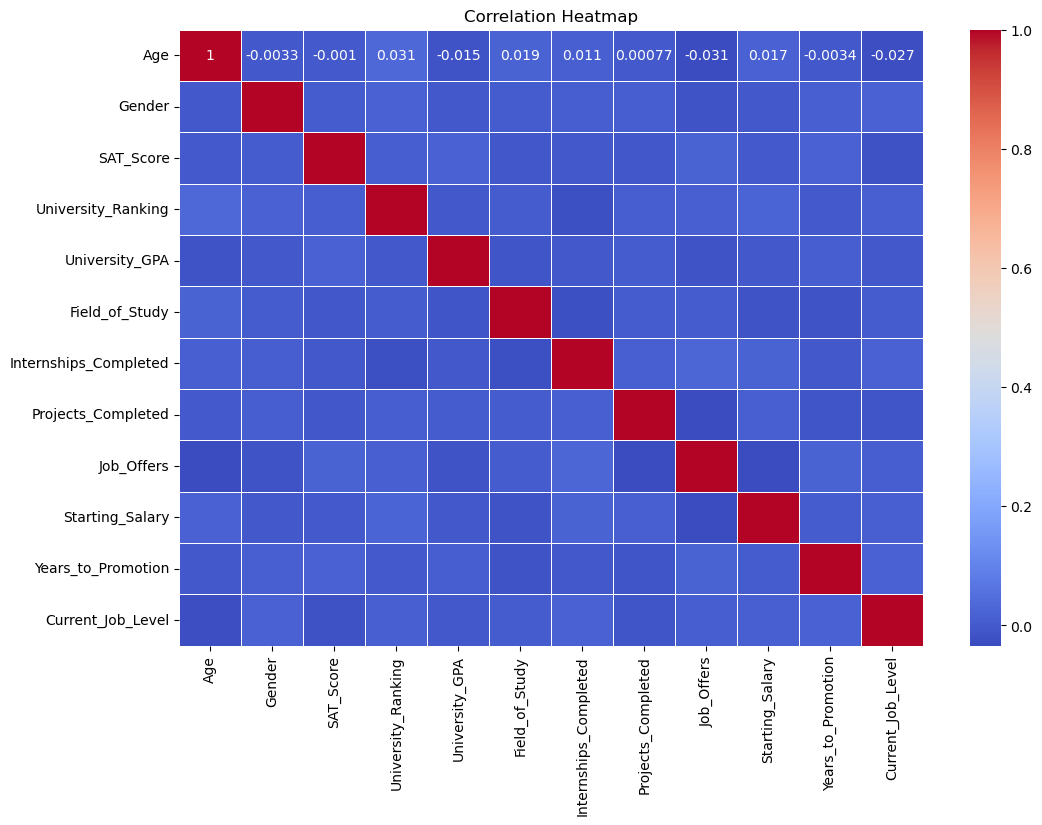

In [89]:
# Create a correlation heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", linewidths=0.5)  
plt.title("Correlation Heatmap")  
plt.show()

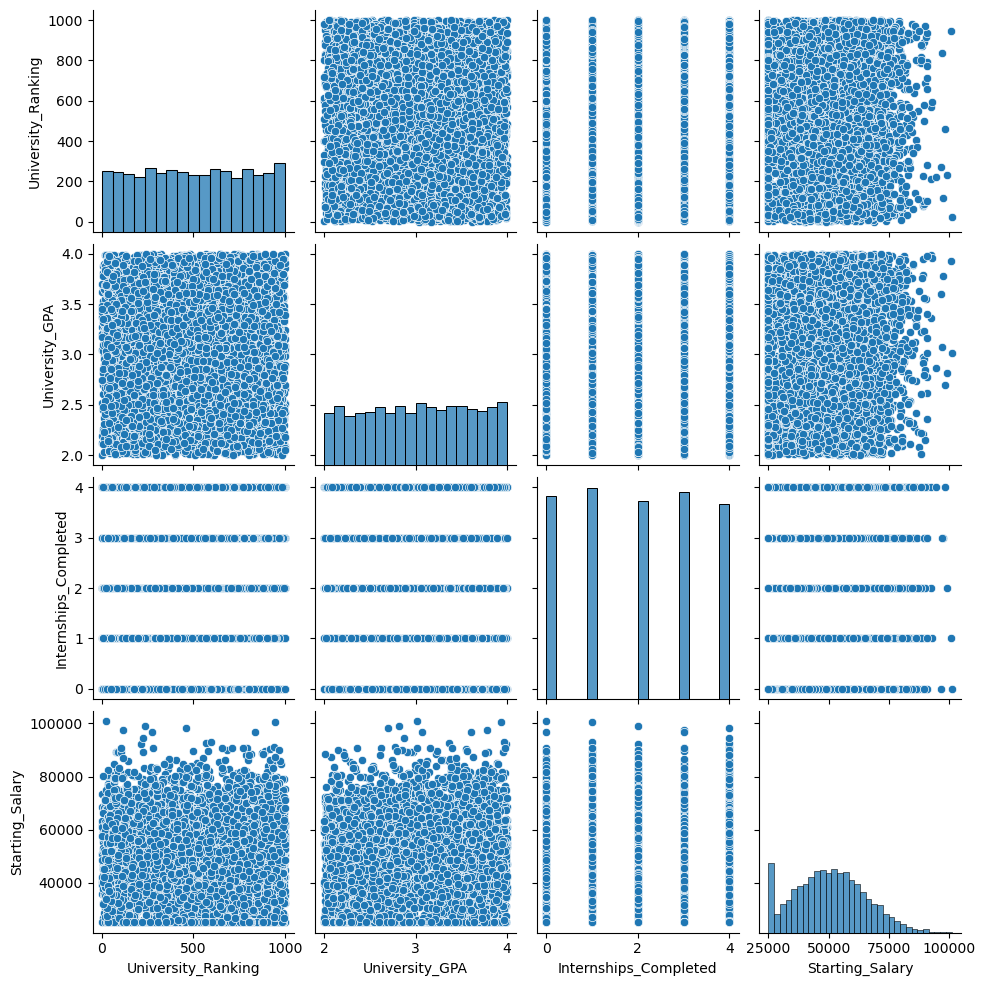

In [91]:
sns.pairplot(df[['University_Ranking', 'University_GPA', 'Internships_Completed', 'Starting_Salary']])
plt.show()


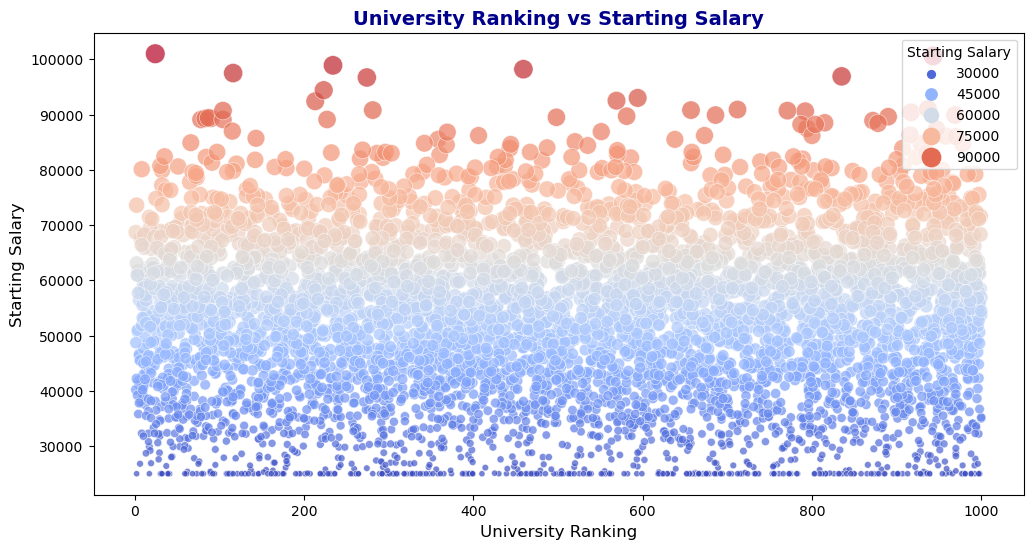

In [93]:
plt.figure(figsize=(12, 6))

# Scatter plot with color gradient and transparency
sns.scatterplot(
    x=df['University_Ranking'],
    y=df['Starting_Salary'],
    hue=df['Starting_Salary'],  # Color based on salary
    palette="coolwarm",         # Attractive color palette
    size=df['Starting_Salary'], # Size variation for better visualization
    sizes=(20, 200),            # Define min and max point sizes
    alpha=0.7                   # Adjust transparency for better readability
)

# Titles and labels with customization
plt.title("University Ranking vs Starting Salary", fontsize=14, fontweight='bold', color="darkblue")
plt.xlabel("University Ranking", fontsize=12)
plt.ylabel("Starting Salary", fontsize=12)

# Customizing the legend
plt.legend(title="Starting Salary", fontsize=10, loc="upper right")

# Show the plot
plt.show()

## Check Outcomes Proportionality

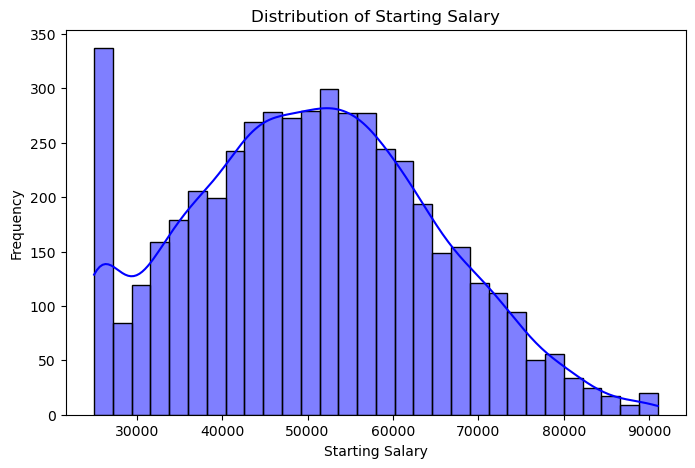

In [95]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Starting_Salary"], bins=30, kde=True, color="blue")
plt.title("Distribution of Starting Salary")
plt.xlabel("Starting Salary")
plt.ylabel("Frequency")
plt.show()

In [97]:
df_cleaned["GPA_Internship_Interaction"] = df_cleaned["University_GPA"] * df_cleaned["Internships_Completed"]


## Separate independent features and Target Variable

In [103]:
selected_features = ["SAT_Score", "University_Ranking", "University_GPA",
                     "Internships_Completed", "Projects_Completed", "Job_Offers",
                     "Years_to_Promotion", "Current_Job_Level", "GPA_Internship_Interaction"]
X = df_cleaned[selected_features]
y = df_cleaned["Starting_Salary"]

# One-hot encode categorical variables
categorical_cols = ["Current_Job_Level"]
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded features
X = X.drop(columns=categorical_cols)
y = pd.concat([X.reset_index(drop=True), encoded_df], axis=1)


## Apply Normalization or Standardization

In [105]:
# Apply Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-0.99359842, -0.73381563,  1.63337189,  0.72401939,  0.85063457,
         1.468532  ,  1.40050892,  1.32430469],
       [-0.21089812, -1.34891155,  1.06040981,  1.43450969,  0.85063457,
         0.88386149, -1.42229241,  1.91669721],
       [-0.2995057 ,  0.72317133, -0.6758389 ,  1.43450969,  1.19894514,
        -1.45482055, -0.01089175,  1.01913278],
       [ 1.19697789, -1.14960673, -0.36331413,  0.72401939,  1.5472557 ,
        -0.87015004,  1.40050892,  0.55015536],
       [-1.19050415,  0.32456169, -0.93627621,  1.43450969,  0.50232401,
         0.88386149,  1.40050892,  0.88449811]])

## Implement Simple Linear Regression

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.0360800734580557
R² Score: 0.7259125276670844
